In [47]:
import pyreadr
import glob
import pandas as pd
import numpy as np
import dask.dataframe as dd
import matplotlib.pyplot as plt
import json
import dask
import geopandas as gp
import matplotlib.pyplot as plt
from math import radians, cos, sin, asin, sqrt

In [48]:
result = pyreadr.read_r('corn_first.rda')
print(result.keys()) # here you get the object name
df1 = result["data00"] # data00 is the python object name I get from the previous row
df1

odict_keys(['data00'])


,Date,Open,High,Low,Settle,Volume,Prev. Day Open Interest
0,1959-07-01,118.00,118.20,117.50,117.70,541.0,7505.0
1,1959-07-02,117.60,118.00,117.10,117.60,1156.0,7897.0
2,1959-07-06,117.60,117.60,116.60,117.10,1495.0,8034.0
3,1959-07-07,117.10,117.70,117.00,117.10,1204.0,7977.0
4,1959-07-08,117.40,117.50,116.60,117.00,1244.0,7770.0
...,...,...,...,...,...,...,...
14835,2018-05-21,405.50,407.50,401.25,402.75,171591.0,810077.0
14836,2018-05-22,402.25,407.00,401.00,404.75,153128.0,811230.0
14837,2018-05-23,404.50,409.00,403.00,408.50,147575.0,797146.0
14838,2018-05-24,408.25,412.25,403.75,404.25,222820.0,789532.0


In [49]:
df1['Date2']=df1['Date'].astype(str)

In [50]:
df1['Date3']=df1['Date2'].str[0:4]+df1['Date2'].str[5:7]+df1['Date2'].str[8:]

In [51]:
df1['Date3']=df1['Date3'].astype(int)

In [52]:
df1

,Date,Open,High,Low,Settle,Volume,Prev. Day Open Interest,Date2,Date3
0,1959-07-01,118.00,118.20,117.50,117.70,541.0,7505.0,1959-07-01,19590701
1,1959-07-02,117.60,118.00,117.10,117.60,1156.0,7897.0,1959-07-02,19590702
2,1959-07-06,117.60,117.60,116.60,117.10,1495.0,8034.0,1959-07-06,19590706
3,1959-07-07,117.10,117.70,117.00,117.10,1204.0,7977.0,1959-07-07,19590707
4,1959-07-08,117.40,117.50,116.60,117.00,1244.0,7770.0,1959-07-08,19590708
...,...,...,...,...,...,...,...,...,...
14835,2018-05-21,405.50,407.50,401.25,402.75,171591.0,810077.0,2018-05-21,20180521
14836,2018-05-22,402.25,407.00,401.00,404.75,153128.0,811230.0,2018-05-22,20180522
14837,2018-05-23,404.50,409.00,403.00,408.50,147575.0,797146.0,2018-05-23,20180523
14838,2018-05-24,408.25,412.25,403.75,404.25,222820.0,789532.0,2018-05-24,20180524


In [53]:
df1s= df1[df1['Date3']>=19980101]
df1s.reset_index(drop=True, inplace=True)

In [54]:
df1['col2'] = df1['Date'].astype(str)
df1['MD'] = df1['col2'].str[5:]
A = df1.pop('MD')
df1.insert(0, 'MD', A)
del df1['col2']

In [55]:
df1['col2'] = df1['Date'].astype(str)
df1['Month'] = df1['col2'].str[5:7]
A = df1.pop('Month')
df1.insert(0, 'Month', A)
del df1['col2']

In [56]:
df1['col2'] = df1['Date'].astype(str)
df1['Day'] = df1['col2'].str[8:]
A = df1.pop('Day')
df1.insert(0, 'Day', A)
del df1['col2']

In [57]:
result2 = pyreadr.read_r('corn_third.rda')
print(result2.keys()) # here you get the object name
df3 = result2["data00"] # data00 is the python object name I get from the previous row
df3

odict_keys(['data00'])


,Date,Open,High,Low,Settle,Volume,Prev. Day Open Interest
0,1959-08-03,119.40,119.60,119.40,119.60,0.0,0.0
1,1959-08-04,119.40,119.60,119.40,119.50,15.0,10.0
2,1959-08-05,119.30,119.30,119.30,119.30,55.0,30.0
3,1959-08-06,118.40,118.60,118.20,118.60,0.0,30.0
4,1959-08-07,118.60,118.60,118.60,118.60,50.0,60.0
...,...,...,...,...,...,...,...
14813,2018-05-21,422.75,424.75,419.00,421.00,79451.0,497649.0
14814,2018-05-22,420.25,425.00,419.25,423.25,81650.0,508118.0
14815,2018-05-23,423.00,426.75,421.75,426.50,76383.0,514429.0
14816,2018-05-24,426.00,429.50,421.75,422.50,101308.0,518832.0


In [58]:
df3['Date2']=df3['Date'].astype(str)
df3['Date3']=df3['Date2'].str[0:4]+df3['Date2'].str[5:7]+df3['Date2'].str[8:]
df3['Date3']=df3['Date3'].astype(int)
del df3['Date2']

In [59]:
df3s= df3[df3['Date3']>=19980101]
df3s.reset_index(drop=True, inplace=True)

In [60]:
df1s['Settle_3']=df3s['Settle']


<ipython-input-60-20ccffe871a4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1s['Settle_3']=df3s['Settle']


In [61]:
df1s['Cost_o_C']=df1s['Settle_3']-df1s['Settle']

<ipython-input-61-38d02c1b81c2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1s['Cost_o_C']=df1s['Settle_3']-df1s['Settle']


In [62]:
df1s['col']=df1s['Date'].astype(str)
df1s['Month']=df1s['col'].str[5:7]
df1s['Day']=df1s['col'].str[8:]
df1s['M_D']=df1s['col'].str[0:4]+df1s['col'].str[5:7]
df1s['YMD']=df1s['col'].str[0:4]+df1s['col'].str[5:7]+df1s['col'].str[8:]
del df1s['col']
df1s['Month']=df1s['Month'].astype(int)
df1s['Day']=df1s['Day'].astype(int)

<ipython-input-62-43979f69a9a3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1s['col']=df1s['Date'].astype(str)
<ipython-input-62-43979f69a9a3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1s['Month']=df1s['col'].str[5:7]
<ipython-input-62-43979f69a9a3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/

In [82]:
df1s['MD']=df1s['M_D'].astype(int)

<ipython-input-82-ad9ebc6f86f9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1s['MD']=df1s['M_D'].astype(int)


2008 start at 2517 row

In [83]:
df_prices=df1s.loc[2517:]

In [84]:
df_prices.reset_index(drop=True, inplace=True)

In [ ]:
def apply(rows):
    rows.iloc[14,:]

In [87]:
df_prices=df_prices.groupby('MD').apply(take_15)

In [94]:
df_prices['Slope'] = np.where(df_prices.Cost_o_C >= 0, True, False)

In [97]:
df_prices['Slope']=df_prices['Slope'].astype(int)

In [102]:
print(df_prices)

              Date    Open    High     Low  Settle    Volume  \
MD                                                             
200801  2008-01-23  489.00  489.00  469.00  469.25   23365.0   
200802  2008-02-22  524.00  524.00  519.50  522.25   34753.0   
200803  2008-03-24  515.00  525.50  514.75  524.75  149989.0   
200804  2008-04-21  590.00  590.00  569.50  580.25   51173.0   
200805  2008-05-21  592.50  609.00  591.00  607.25  102239.0   
...            ...     ...     ...     ...     ...       ...   
201801  2018-01-23  351.75  352.00  349.50  351.25  191553.0   
201802  2018-02-22  365.50  367.00  364.25  366.75  194582.0   
201803  2018-03-21  375.00  375.75  373.75  375.00  140380.0   
201804  2018-04-20  381.25  381.75  376.25  376.50  135146.0   
201805  2018-05-21  405.50  407.50  401.25  402.75  171591.0   

        Prev. Day Open Interest       Date2     Date3  Settle_3  Cost_o_C  \
MD                                                                          
200801       

In [99]:
df_prices.to_csv('Price_data.csv') ##data file with the prices

In [100]:
#Plotting

In [18]:
df1sa=df1s[(df1s['Day']>=1) & (df1s['Day']<=3)]

In [19]:
df1sa_mean=df1sa.groupby('M_D').mean()

<module 'matplotlib.pyplot' from 'C:\\Users\\Utente\\anaconda3\\envs\\ace592\\lib\\site-packages\\matplotlib\\pyplot.py'>


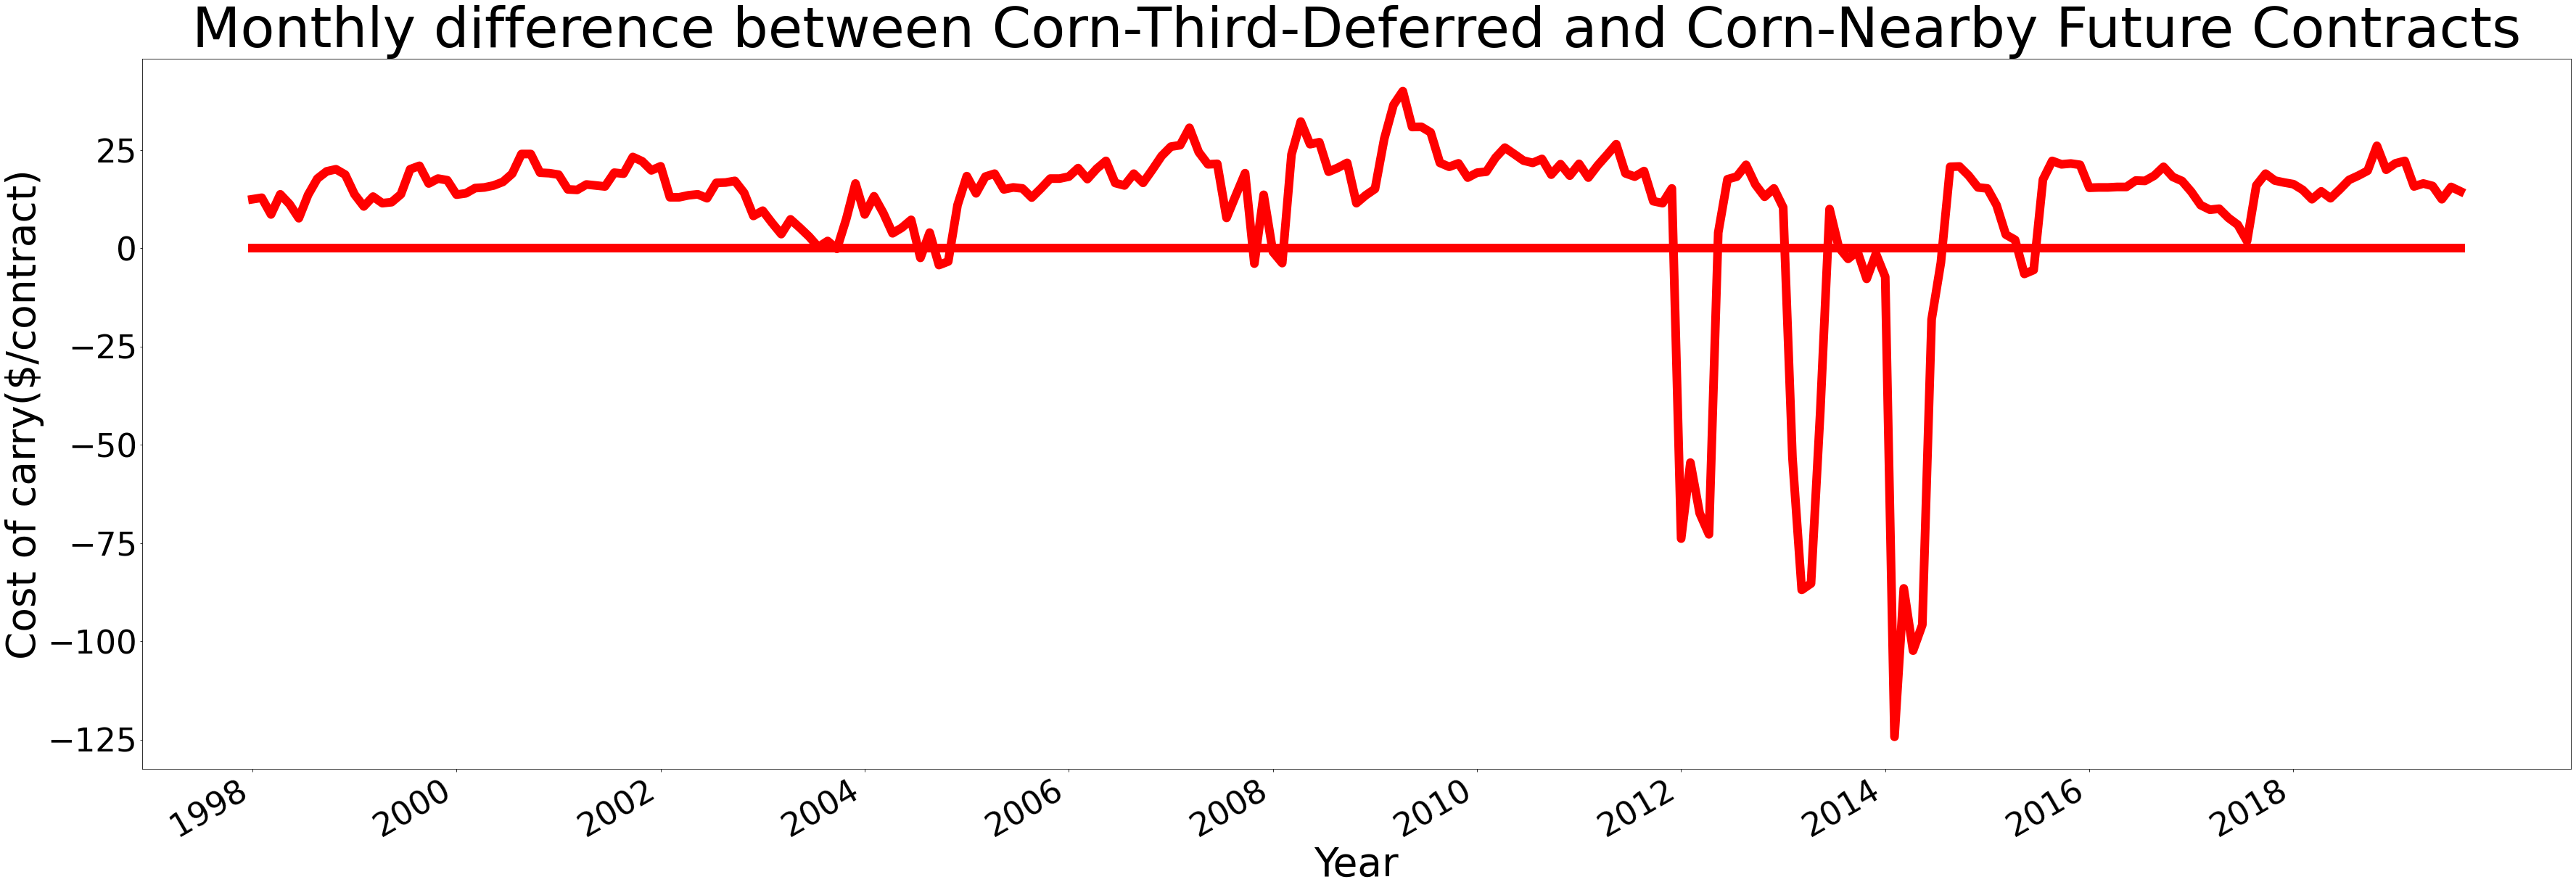

In [193]:
x = range(1,240) #actual position
y = df1sa_mean['Cost_o_C']
y2=[0]*239
labels=['1998','2000','2002','2004','2006','2008','2010','2012','2014','2016','2018'] #position that I want to change
l=range(1,242) #actual position

fig, ax1= plt.subplots(figsize=(60,20))

ax1.plot(x, y, 'r-',linewidth=12)
ax1.plot(x, y2, 'r-',linewidth=12)

ax1.set_xticks(l[::22], minor=False)
ax1.set_xticklabels(labels, fontdict=None, minor=False,fontsize=45)
ax1.tick_params(axis='y', labelsize= 45)
plt.setp(ax1.get_xticklabels(), rotation=30, horizontalalignment='right')


ax1.set_xlabel('Year',fontsize=55)
ax1.set_ylabel('Cost of carry($/contract)',fontsize=55)

ax1.set_title('Monthly difference between Corn-Third-Deferred and Corn-Nearby Future Contracts',fontsize=77)
#plt.savefig("CRTvsBAS_noDec_daily.pdf")

plt.gcf().autofmt_xdate()
print(plt)

In [ ]:
#Brazil weather #declaration of consition of floods cme #distuption of delivery perios --> spot px in these days--> track declaration of force/days 

In [202]:
df_n=df1sa[df1sa['Cost_o_C']<0].sort_values(by='Cost_o_C', ascending=True)

In [203]:
print(df_n[['Cost_o_C','Date']]) #date where cost of carry is negative= backwardation

      Cost_o_C        Date
3818   -124.25  2013-03-01
3862   -107.75  2013-05-03
3861   -103.00  2013-05-02
3860    -96.25  2013-05-01
3882    -95.75  2013-06-03
3838    -91.25  2013-04-01
3608    -90.25  2012-05-01
3589    -89.75  2012-04-03
3839    -85.75  2013-04-02
3610    -85.00  2012-05-03
3588    -84.00  2012-04-02
3840    -82.50  2013-04-03
3313    -80.75  2011-03-01
3609    -80.50  2012-05-02
3377    -79.00  2011-06-01
3356    -73.25  2011-05-02
3315    -71.75  2011-03-03
3378    -71.50  2011-06-02
3314    -69.00  2011-03-02
3379    -67.75  2011-06-03
3357    -61.50  2011-05-03
3566    -56.00  2012-03-01
3336    -54.50  2011-04-01
3567    -50.50  2012-03-02
3630    -41.50  2012-06-01
3902    -18.50  2013-07-01
3903    -18.25  2013-07-02
3904    -17.50  2013-07-03
3924     -7.75  2013-08-01
3758     -7.75  2012-12-03
4112     -7.50  2014-05-01
3799     -7.25  2013-02-01
4133     -7.00  2014-06-02
1611     -6.75  2004-06-01
4113     -5.50  2014-05-02
1591     -4.25  2004-05-03
4